# seaborn - 빈도 그래프

막대 그래프 중에서 빈도 그래프 그리는 기능에 최적화 된 `catplot()` 메서드의 사용방법 확인

## #01. 기본 준비

### 패키지 참조

In [17]:
import sys
from matplotlib import pyplot as plt
from pandas import read_excel
import seaborn as sb

### 그래프 전역 설정

In [18]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 10
plt.rcParams["figure.figsize"] = (5, 5)
plt.rcParams["axes.unicode_minus"] = False

### 데이터 준비하기

#### 타이타닉 탑승객 데이터

> 출처: https://www.kaggle.com/competitions/titanic

| 변수명 | 설명 |
|---|---|
| PassengerId | 탑승객의 ID(인덱스와 같은 개념) |
| Survived | 생존유무(0은 사망 1은 생존) |
| Pclass | 객실의 등급 |
| Name | 이름 |
| Sex |성별 |
| SibSp | 동승한 형제 혹은 배우자의 수 |
| Parch | 동승한 자녀 혹은 부모의 수 |
| Ticket | 티켓번호 |
| Fare | 요금 |
| Cabin | 선실 |
| Embarked | 탑승지 (C = Cherbourg, Q = Queenstown, S = Southampton) |

In [19]:
titanic = read_excel("https://data.hossam.kr/D01/titanic.xlsx", index_col="PassengerId")
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## #02. 데이터 전처리

### 범주형 데이터 처리

#### 각 요인별 데이터 타입 확인

In [20]:
titanic.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

#### 범주형 데이터 처리

In [21]:
df = titanic.astype({"Survived": "category", "Pclass": "category", "Sex": "category", 
                     "Cabin": "category", "Embarked": "category"})
df.dtypes

Survived    category
Pclass      category
Name          object
Sex         category
Age          float64
SibSp          int64
Parch          int64
Ticket        object
Fare         float64
Cabin       category
Embarked    category
dtype: object

## #03. 빈도 막대 그래프

병렬 막대그래프는 두 변량에 대한 빈도 막대그래프 2개를 각각의 캔버스(canvas)에 병렬로 나열한 그래프

`catplot()` 메서드를 사용.

`catplot()`은 기본적으로 범주형 변수에 대한 그래프를 그리는 데 사용되지만, 다양한 플롯 유형을 지원한다.

### 1. 기본 사용 방법

`x`축으로 집단을 구분할 수 있는 범주형 변수를 설정하고 `kind='count'` 파라미터를 설정한다.

`catplot()` 함수의 결과물은 그래프의 크기가 `rcParams` 속성의 영향을 받지 않는다.

크기 설정을 위해서는 `catplot()` 메서드로부터 객체를 리턴받아 사이즈 설정을 개별적으로 수행해야 한다.

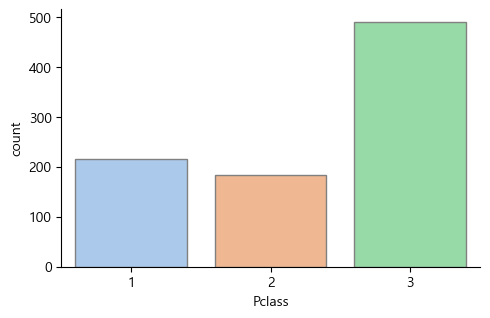

In [29]:
g = sb.catplot(data=df,
            x='Pclass',       # 집단을 구분하는 기준
            kind="count",     # 그래프 종류
            palette='pastel', # 색상표 지정
            edgecolor='0.5'   # 막대 테두리 색상 투명도 지정(0=불투명 ~ 1=투명, ex: 0.5=반투명)
        )

g.fig.set_figwidth(5)
g.fig.set_figheight(3)

plt.show()
plt.close()

### 2. 범례 기준 추가

각 막대를 구분할 수 있는 범주형 변수를 `hue` 파라미터로 추가

`kind` : 그래프의 종류는 범주형 축 수준 플로팅 함수의 이름 (그래프 형태에 관여)

- "strip", "swarm", "box", "violin", "boxen", "point", "bar" 또는 "count"

#### 객실 등급별 탑승 지역 빈도

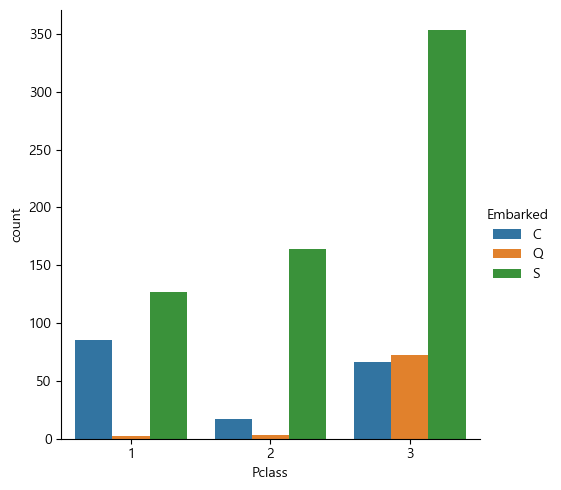

In [23]:
sb.catplot(data=df,
            x='Pclass',     # 집단을 구분하는 기준
            kind='count',    # 빈도 막대그래프 그리기
            hue='Embarked' 
        )

plt.show()
plt.close()

#### 객실 등급별 성별 빈도

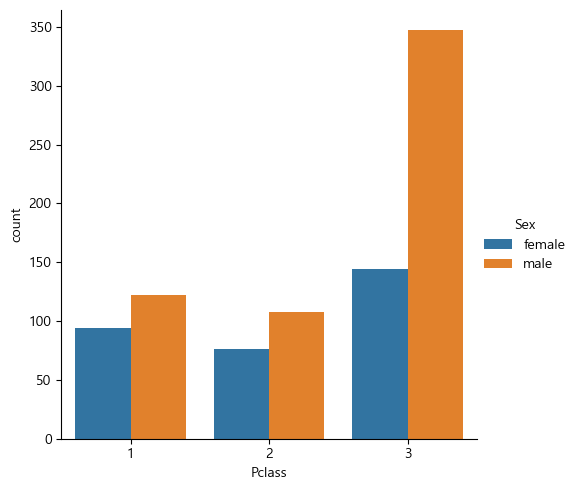

In [24]:
sb.catplot(data=df,
            x='Pclass',     # 집단을 구분하는 기준
            kind='count',    # 빈도 막대그래프 그리기
            hue='Sex' 
        )

plt.show()
plt.close()

#### 객실 등급별 생존여부 빈도

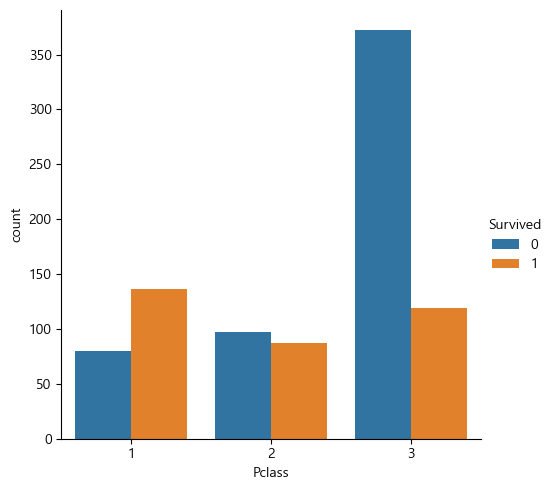

In [25]:
sb.catplot(data=df,
            x='Pclass',     # 집단을 구분하는 기준
            kind='count',    # 빈도 막대그래프 그리기
            hue='Survived' 
        )

plt.show()
plt.close()

### 3. 병렬 빈도 막대 그래프

이미 범주가 주어진 상황에서 추가적인 범주를 표현하고자 할 때 그래프를 두 개로 분리

병렬 막대그래프는 두 변량에 대한 빈도 막대그래프 2개를 각각의 캔버스(canvas)에 병렬로 나열한 그래프

Seaborn으로 병렬 빈도 막대그래프를 그리려면 sns.catplot 함수에 kind='count' 와 col 옵션을 추가한다.

#### 객실 등급에 따른 생존 여부를 두 개의 그래프로 분리

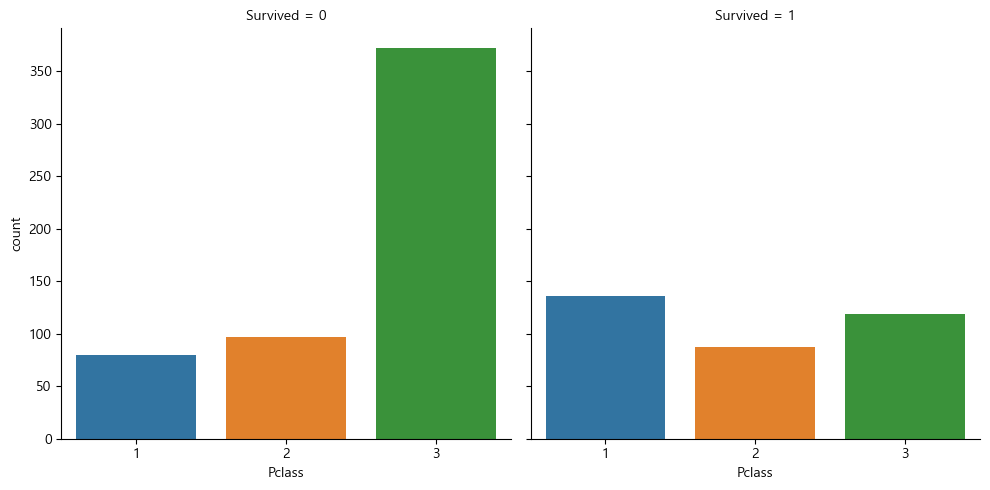

In [26]:
sb.catplot(data=titanic,
            x='Pclass',
            col='Survived',   # 캔버스 분리하기
            kind='count' # 빈도 막대그래프 그리기
        )

plt.show()
plt.close()

### 4. 가로 빈도 막대 그래프

`x` 파라미터 대신 `y` 파라미터를 사용한다.

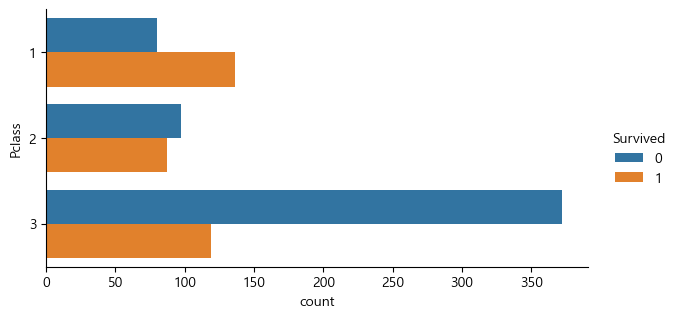

In [33]:
g = sb.catplot(data=df,
            y='Pclass',     # 집단을 구분하는 기준
            kind='count',    # 빈도 막대그래프 그리기
            hue='Survived' 
        )

g.fig.set_figwidth(7)
g.fig.set_figheight(3)

plt.show()
plt.close()